In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [3]:
def simulate_election(n_candidates, n_population):
    candidate_dims = np.random.multivariate_normal(np.array([0, 0]), np.array([[1, 0], [0, 1]]), n_candidates).reshape((2, 1, n_candidates))
    
    ballots = generate_ballots(candidate_dims, n_population)
    
    return ballots, candidate_dims

def generate_ballots(candidate_dims, n_population):
    population_dims = np.random.multivariate_normal(np.array([0, 0]), np.array([[1, 0], [0, 1]]), n_population).reshape((2, n_population, 1))
    euclidean_distances = np.sqrt(np.sum(np.power((population_dims - candidate_dims), 2), axis=0))
    rankings = np.argsort(euclidean_distances)
    ballots = {}
    for i_pop in range(n_population):
        ballot = ''
        for rank in rankings[i_pop]:
            ballot += str(rank) + '-'
            
        if ballot in ballots.keys():
            ballots[ballot] += 1 / n_population
        else:
            ballots[ballot] = 1 / n_population
    
    return ballots

def get_loss(predicted_ballots, actual_ballots):
    total_loss = 0
    for ballot in set(predicted_ballots.keys()) | set(actual_ballots.keys()):
#     for ballot in actual_ballots:
#         if ballot not in predicted_ballots.keys():
#             continue
        p_ballot = actual_ballots[ballot] if ballot in actual_ballots.keys() else 1e-8
        q_ballot = predicted_ballots[ballot] if ballot in predicted_ballots.keys() else 1e-8
#         p_ballot = actual_ballots[ballot]
#         q_ballot = predicted_ballots[ballot]
        total_loss += p_ballot * np.log(p_ballot / q_ballot)
#         total_loss += np.abs(p_ballot - q_ballot)
    
    return total_loss
    

In [41]:
n_candidates = 8

ballots_actual, candidate_dims_actual = simulate_election(n_candidates, 1000000)

print(f"ballots: {ballots_actual}")
print(f"candidate_dims_actual: {candidate_dims_actual}")

ballots: {'5-2-1-0-7-6-3-4-': 0.010382999999998824, '2-1-5-0-4-6-7-3-': 0.08838400000006773, '5-2-1-0-7-6-4-3-': 0.11839800000009774, '4-6-0-1-2-7-5-3-': 0.02350300000000285, '1-2-0-4-5-6-7-3-': 0.02553000000000488, '5-7-0-1-2-6-3-4-': 0.006876000000000588, '2-5-1-0-4-7-6-3-': 0.009174999999999711, '7-6-0-5-4-1-2-3-': 0.004534000000000277, '7-3-6-0-5-1-4-2-': 0.0011240000000000048, '2-1-5-0-6-7-4-3-': 0.0024990000000000073, '1-2-0-5-4-6-7-3-': 0.023224000000002572, '4-6-0-1-7-2-5-3-': 0.017604999999996953, '4-1-2-0-6-5-7-3-': 0.020628999999999977, '6-7-4-0-1-5-2-3-': 0.012657999999997152, '5-2-7-1-0-3-6-4-': 0.0006350000000000089, '2-1-0-5-4-6-7-3-': 0.052197000000031545, '5-2-1-0-7-3-6-4-': 0.0031430000000000928, '7-5-0-6-1-2-3-4-': 0.004827000000000316, '5-0-7-1-2-6-4-3-': 0.009797999999999253, '0-6-1-4-7-2-5-3-': 0.0009950000000000156, '7-6-5-0-3-1-2-4-': 0.0011630000000000015, '4-0-6-1-2-7-5-3-': 0.01750099999999685, '5-7-0-3-6-1-2-4-': 0.0004990000000000056, '5-0-2-1-7-6-4-3-': 0.

0 14.063066671243057
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[2.35439086e-10 3.64549378e-11 1.41186156e-10 9.96349183e-05
  5.42740659e-11 2.04370664e-10 1.00337215e-10 5.79666378e-11]] [[1 4 7 6 2 5 0 3]]
[[0.80928586]]
1 14.001783074696808
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[1.41421358e-02 8.41565836e-07 3.69298150e-07 1.41275107e-02
  1.41421357e-02 1.12405690e-06 1.11137856e-04 1.00000000e-02]] [[2 1 5 6 7 3 4 0]]
[[0.74678912]]
2 14.063063446151729
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[1.41415821e-02 1.41420627e-02 8.37886532e-07 1.41270913e-02
  1.41447819e-02 1.41429176e-02 1.08838278e-04 3.42386020e-06]] [[2 7 6 3 0 1 5 4]]
[[0.64810925]]
3 14.063063924863865
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0084455  0.04090541 0.02788506 0.10147744 0.07603459 0.05348922
  0.04283756 0.0598268 ]] [[0 2 1 6 5 7 4 3]]
[[0.94491456]]
33 13.063674131820717
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.02256411 0.03248096 0.03239222 0.10790613 0.08998576 0.05370711
  0.0558765  0.06874417]] [[0 2 1 5 6 7 4 3]]
[[0.9438923]]
34 14.040551649879845
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.01873585 0.04090541 0.02788506 0.09963248 0.10398854 0.05348922
  0.06210604 0.07955149]] [[0 2 1 5 6 7 3 4]]
[[0.91173126]]
35 13.442504392002656
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.01731386 0.05187706 0.03239222 0.09223004 0.08998576 0.05370711
  0.0558765  0.07198559]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03339474 0.07596003 0.08597112 0.18485373 0.18983607 0.06968209
  0.0925232  0.0676928 ]] [[0 7 5 1 2 6 3 4]]
[[0.90387943]]
64 11.88142748363446
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03303973 0.06304208 0.08979262 0.19899107 0.20215383 0.06676069
  0.10666167 0.05355753]] [[0 7 1 5 2 6 3 4]]
[[0.90399268]]
65 11.319973682852009
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03339474 0.07049957 0.10318991 0.19984639 0.19581741 0.05271798
  0.0925232  0.0676928 ]] [[0 5 7 1 6 2 4 3]]
[[0.9064776]]
66 11.20258524154394
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04725368 0.06304208 0.1082582  0.18577414 0.20215383 0.06676069
  0.09693811 0.06953689]] 

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03373503 0.09034211 0.12126534 0.33887621 0.21659649 0.16553434
  0.12681563 0.07408403]] [[0 7 1 2 6 5 4 3]]
[[0.94646553]]
96 11.275559560977007
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04757841 0.08225455 0.1082582  0.34512778 0.21922614 0.15140612
  0.12515234 0.06953689]] [[0 7 1 2 6 5 4 3]]
[[0.95234036]]
97 11.265073785931836
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04724584 0.09034211 0.10318991 0.33887621 0.2227244  0.15141073
  0.12681563 0.05587015]] [[0 7 1 2 6 5 4 3]]
[[0.94357647]]
98 11.188759640610943
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04757841 0.07978769 0.1082582  0.33310807 0.21922614 0.15140612
  0.12515234 0.06953689

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03961803 0.10228464 0.12937177 0.3858249  0.23634497 0.11716309
  0.0965465  0.06876954]] [[0 7 6 1 5 2 4 3]]
[[0.94940679]]
127 11.746233748841837
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05191571 0.09547588 0.14342865 0.39081576 0.2227244  0.10440263
  0.10459599 0.0676928 ]] [[0 7 1 5 6 2 4 3]]
[[0.95242791]]
128 10.2486408999171
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04757841 0.08288932 0.14265125 0.40399496 0.23634497 0.09875134
  0.11607488 0.08183044]] [[0 7 1 5 6 2 4 3]]
[[0.96049034]]
129 10.347802786656942
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03373503 0.07089172 0.12850936 0.39081576 0.2227244  0.08558357
  0.1280876  0.0827233

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04736501 0.06101172 0.13508314 0.37770622 0.26763517 0.09303583
  0.14049729 0.11321618]] [[0 1 5 7 2 6 4 3]]
[[0.96089132]]
159 11.070476955490902
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05804393 0.05449654 0.14860074 0.38332504 0.25938875 0.10715851
  0.14750791 0.12701106]] [[1 0 5 7 6 2 4 3]]
[[0.96458675]]
160 11.265992029590638
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.06736142 0.05115972 0.14527415 0.39624873 0.24785023 0.10740049
  0.13574067 0.11321618]] [[1 0 5 7 6 2 4 3]]
[[0.96681746]]
161 10.636859776542229
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05804393 0.06524008 0.15918324 0.39081576 0.23659449 0.12149957
  0.1280876  0.11732

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07057176 0.13764414 0.17980331 0.55391378 0.18233981 0.15165589
  0.17772999 0.19495504]] [[0 1 5 6 2 4 7 3]]
[[0.98266031]]
191 8.666641355907348
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05841155 0.15160759 0.16641666 0.54142913 0.19570537 0.16020036
  0.16603871 0.19533152]] [[0 1 5 6 2 7 4 3]]
[[0.98199386]]
192 9.304889702023612
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.06736142 0.13764414 0.17980331 0.52902792 0.20917308 0.16949573
  0.17772999 0.18121947]] [[0 1 5 6 2 7 4 3]]
[[0.98037404]]
193 9.730008373953863
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07814106 0.13600907 0.17593075 0.53604724 0.21377426 0.16020036
  0.18579829 0.16711251

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.06736142 0.12189961 0.12919851 0.57508882 0.25859697 0.13012304
  0.1901579  0.23791227]] [[0 1 2 5 6 7 4 3]]
[[0.99338229]]
223 8.739712162103974
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05804393 0.12170485 0.1432724  0.5637838  0.27262644 0.13943717
  0.17703371 0.23737983]] [[0 1 5 2 6 7 4 3]]
[[0.99055474]]
224 9.660704426278079
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.06736142 0.12189961 0.15735852 0.57508882 0.28666699 0.15002456
  0.18295898 0.23768913]] [[0 1 5 2 6 7 4 3]]
[[0.98886489]]
225 10.721069967903942
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05804393 0.10779872 0.15918324 0.58361224 0.27262644 0.14140952
  0.19568619 0.2388368

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.10753794 0.13583454 0.12357795 0.57554293 0.25472947 0.13200056
  0.21700749 0.20944763]] [[0 2 5 1 7 6 4 3]]
[[0.98876313]]
255 9.550738636967347
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.097423   0.13712614 0.13769244 0.58366773 0.26825162 0.12473774
  0.20918699 0.22356703]] [[0 5 1 2 6 7 4 3]]
[[0.98905284]]
256 7.771749863474761
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.10753794 0.13984325 0.13758137 0.59201889 0.28183463 0.11872176
  0.19733246 0.20944763]] [[0 5 2 1 6 7 4 3]]
[[0.9858079]]
257 7.950890902931613
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11741106 0.12616332 0.15171135 0.60058698 0.27832652 0.13193018
  0.18579829 0.20909657]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0912278  0.15731384 0.18353053 0.54053436 0.25472947 0.12783164
  0.21118274 0.19495504]] [[0 5 1 2 7 6 4 3]]
[[0.97756963]]
287 8.427592071937093
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09870896 0.16217336 0.18125363 0.5526252  0.26825162 0.13193018
  0.20499476 0.18081361]] [[0 5 1 7 2 6 4 3]]
[[0.97540604]]
288 9.006422478049581
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0912278  0.15731384 0.18006195 0.56481132 0.27262434 0.14531445
  0.21118274 0.19495504]] [[0 5 1 2 7 6 4 3]]
[[0.97965373]]
289 7.936770245918809
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07905278 0.17084084 0.16593555 0.57708669 0.2776493  0.15883012
  0.19876844 0.18081361

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03058958 0.07934241 0.16483084 0.60186709 0.30673727 0.18866881
  0.18163621 0.25152155]] [[0 1 2 6 5 7 4 3]]
[[0.98951065]]
319 8.018410895315705
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.01774185 0.09345678 0.15980811 0.61470417 0.31616385 0.17517192
  0.19174725 0.26566332]] [[0 1 2 5 6 7 4 3]]
[[0.99038518]]
320 6.991763979339654
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0096863  0.10757844 0.15591041 0.62070892 0.30593215 0.17131797
  0.20163399 0.26593972]] [[0 1 2 5 6 7 4 3]]
[[0.99171356]]
321 8.874963924125279
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0238116  0.09345678 0.14219831 0.62697521 0.2961801  0.15760435
  0.2120036  0.26566332

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.10329562 0.06524008 0.17792387 0.69021989 0.26121895 0.14173358
  0.17956708 0.30832718]] [[1 0 5 2 6 4 7 3]]
[[0.9908792]]
350 10.587804406785512
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11637505 0.06560268 0.16483084 0.69672221 0.26927155 0.13547344
  0.16719772 0.29419678]] [[1 0 5 2 6 4 7 3]]
[[0.98971394]]
351 10.828590453509536
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12967776 0.06524008 0.17087943 0.69021989 0.27781108 0.14853878
  0.16056084 0.28006756]] [[1 0 5 6 2 4 7 3]]
[[0.98758845]]
352 9.972540748960995
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12584621 0.06788832 0.16483084 0.70286607 0.28679404 0.15426965
  0.16719772 0.2810423

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1120897  0.05162132 0.16335707 0.67791356 0.34838142 0.22668602
  0.23756683 0.29249104]] [[1 0 2 5 6 7 4 3]]
[[0.98895826]]
382 8.226777478348037
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11637505 0.05115972 0.17296273 0.6839482  0.33616143 0.23354566
  0.24965428 0.28780264]] [[1 0 2 5 6 7 4 3]]
[[0.98933277]]
383 9.3438152804239
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12215647 0.06524008 0.16335707 0.67791356 0.34838142 0.24583048
  0.25710417 0.29249104]] [[1 0 2 5 6 7 4 3]]
[[0.98760351]]
384 9.400414565164432
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1097681  0.06560268 0.15296351 0.66509366 0.33616143 0.23354566
  0.26905727 0.27930415]]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09567539 0.18322837 0.19741113 0.79280593 0.35738875 0.15933684
  0.28453189 0.28936766]] [[0 5 1 2 6 7 4 3]]
[[0.99035414]]
414 7.285901189728198
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09451366 0.18175395 0.20050369 0.79847329 0.34850379 0.16756275
  0.29807324 0.3007887 ]] [[0 5 1 2 6 7 4 3]]
[[0.99161545]]
415 6.781765102218119
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09545618 0.18322837 0.19741113 0.80434939 0.33747561 0.15658944
  0.28453189 0.29283647]] [[0 5 1 2 6 7 4 3]]
[[0.99140933]]
416 7.711023327429066
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08147831 0.18175395 0.20050369 0.81042969 0.34664335 0.14616165
  0.27105191 0.30478417

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08661813 0.12585563 0.1392472  0.75497389 0.34664335 0.08807404
  0.28068327 0.28109251]] [[0 5 1 2 6 7 4 3]]
[[0.99113065]]
445 6.622883377287637
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09785637 0.11184809 0.14219831 0.7492303  0.33614954 0.08124046
  0.26700907 0.28936766]] [[5 0 1 2 6 7 4 3]]
[[0.99105688]]
446 6.145813283390395
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09053628 0.11067128 0.15591041 0.7362796  0.32668744 0.07643944
  0.27105191 0.3007887 ]] [[5 0 1 2 6 7 4 3]]
[[0.99086536]]
447 7.448575947809076
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08495744 0.11129362 0.15980811 0.74212343 0.33747561 0.0901778
  0.25764294 0.30918358]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08544918 0.05538673 0.06398566 0.70446622 0.37954831 0.10916957
  0.25764294 0.247371  ]] [[1 2 0 5 7 6 4 3]]
[[0.98594754]]
476 8.062698129315123
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09886723 0.05412534 0.07603857 0.71141562 0.36836371 0.12278037
  0.24431665 0.25832655]] [[1 2 0 5 6 7 4 3]]
[[0.98884501]]
477 6.9783150585381835
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09567539 0.05538673 0.08871056 0.70446622 0.3597499  0.11994154
  0.23108736 0.26730741]] [[1 2 0 5 6 7 4 3]]
[[0.9902115]]
478 9.042819086893356
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.10966745 0.04168986 0.07603857 0.71141562 0.34850379 0.13395148
  0.24431665 0.27819678

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12967776 0.11129362 0.12623287 0.71396978 0.33747561 0.17182603
  0.23982353 0.28652145]] [[1 2 0 5 6 7 4 3]]
[[0.99273897]]
508 7.821308776564833
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12584621 0.09724518 0.11447341 0.70647952 0.34850379 0.17723778
  0.22633177 0.29667354]] [[1 2 0 5 6 7 4 3]]
[[0.99179655]]
509 8.712069401310712
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12967776 0.09997381 0.12325527 0.71396978 0.33747561 0.17182603
  0.23982353 0.28652145]] [[1 2 0 5 6 7 4 3]]
[[0.99307623]]
510 8.634975358446358
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13489022 0.11368557 0.13296451 0.72594162 0.34664335 0.17723778
  0.25338624 0.29667354

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.06787816 0.06740894 0.10331306 0.74298621 0.25741453 0.13665351
  0.25815124 0.24765554]] [[1 0 2 5 7 4 6 3]]
[[0.99747632]]
540 6.422306195910375
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07230763 0.06004854 0.09479393 0.75011201 0.24879135 0.12616321
  0.24403443 0.25876379]] [[1 0 2 5 6 4 7 3]]
[[0.99636766]]
541 6.361771767360451
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08544918 0.06740894 0.10684785 0.76230337 0.26032473 0.1167395
  0.25815124 0.26756199]] [[1 0 2 5 6 4 7 3]]
[[0.9960626]]
542 6.765749035552429
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07230763 0.05669498 0.09479393 0.7695102  0.27210437 0.12616321
  0.27227067 0.27680343]]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.15181058 0.04770935 0.16817146 0.75447083 0.24543585 0.20201104
  0.31820019 0.33278718]] [[1 0 2 5 4 6 7 3]]
[[0.99047937]]
572 8.22877168420708
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.15384213 0.03669519 0.17195737 0.76711448 0.23316717 0.19506777
  0.31925694 0.34463422]] [[1 0 2 5 4 6 7 3]]
[[0.9890544]]
573 7.741129385873922
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1399794  0.04779827 0.15855208 0.77980961 0.22112237 0.20770287
  0.30518421 0.33278718]] [[1 0 2 5 4 6 7 3]]
[[0.991239]]
574 8.00233476273323
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.14357988 0.04189307 0.14528657 0.79255373 0.21384574 0.22052104
  0.30693816 0.32514088]] [[

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04777089 0.06018981 0.12723959 0.74371131 0.22661306 0.20967948
  0.24030546 0.27859443]] [[0 1 2 5 4 6 7 3]]
[[0.99705664]]
603 6.054546615052203
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03753519 0.05561625 0.1138391  0.7306628  0.23604784 0.21799658
  0.22662551 0.27015576]] [[0 1 2 5 6 4 7 3]]
[[0.99654795]]
604 6.512326920070623
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.02807029 0.06018981 0.10064177 0.72527829 0.22661306 0.22689101
  0.22335061 0.25876379]] [[0 1 2 6 4 5 7 3]]
[[0.99490202]]
605 6.724695621150133
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.03753519 0.07321851 0.09613046 0.72013128 0.21768872 0.21799658
  0.22093408 0.27015576

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.02807029 0.04734988 0.12723959 0.69177521 0.1832017  0.13286502
  0.22335061 0.23645955]] [[0 1 2 5 4 6 7 3]]
[[0.99420731]]
635 8.245364999916447
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04075671 0.04802733 0.12370212 0.70469237 0.16997363 0.13979327
  0.20951827 0.24686806]] [[0 1 2 5 4 6 7 3]]
[[0.99248342]]
636 6.854648913319933
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04777089 0.05264254 0.10987102 0.7105145  0.15690509 0.15198415
  0.22335061 0.25645521]] [[0 1 2 5 4 6 7 3]]
[[0.99164065]]
637 7.955893362325455
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05747179 0.0404826  0.10762872 0.69770514 0.14403951 0.145637
  0.20951827 0.26683327]]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07159191 0.07896853 0.09475215 0.7038693  0.2288881  0.20696246
  0.23072224 0.27754408]] [[0 1 2 5 4 6 7 3]]
[[0.99705381]]
667 6.775371083396295
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07383924 0.08426531 0.09308957 0.71026159 0.21475086 0.19818284
  0.24417277 0.28855058]] [[0 1 2 5 4 6 7 3]]
[[0.99665562]]
668 7.764478985045265
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0875967  0.07189051 0.10722053 0.69773428 0.21559925 0.20696246
  0.24878499 0.29746743]] [[1 0 2 5 4 6 7 3]]
[[0.99592855]]
669 8.392338525631857
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.0802051  0.10762872 0.68526982 0.20152223 0.19632732
  0.23559792 0.28680333

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0875967  0.11932887 0.19907407 0.69876011 0.21001552 0.30615512
  0.28568586 0.33401565]] [[0 1 2 4 6 5 7 3]]
[[0.98040438]]
699 8.371546067560603
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.12237142 0.20326875 0.71046703 0.19655709 0.29627564
  0.27281646 0.34401067]] [[0 1 4 2 6 5 7 3]]
[[0.98057975]]
700 7.458409119589893
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.07159191 0.13604103 0.20834079 0.72226111 0.19253464 0.30615512
  0.26712392 0.35401343]] [[0 1 4 2 6 5 7 3]]
[[0.97860183]]
701 7.046005615535456
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.14979839 0.20326875 0.71046703 0.17887918 0.29627564
  0.28025485 0.34430891

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.12237142 0.23990567 0.78084735 0.1760903  0.29781528
  0.26667369 0.34576569]] [[0 1 4 2 6 5 7 3]]
[[0.97861537]]
730 5.904768682076889
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0875967  0.13604103 0.22698933 0.77197304 0.18676086 0.28695336
  0.2791101  0.33701191]] [[0 1 4 2 6 5 7 3]]
[[0.98163733]]
731 5.913403530875448
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09165159 0.14979839 0.23326349 0.78084735 0.1780857  0.27793501
  0.26667369 0.34576569]] [[0 1 4 2 6 5 7 3]]
[[0.97987256]]
732 9.563069120474296
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0875967  0.13604103 0.24585042 0.76995121 0.18970067 0.28913591
  0.26007928 0.3349205 

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04339935 0.12047051 0.18196762 0.79184613 0.25789646 0.28675346
  0.3065437  0.35684181]] [[0 1 2 4 5 6 7 3]]
[[0.99218245]]
761 8.04632574015497
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04423428 0.11391996 0.16817146 0.80074997 0.24543585 0.2762846
  0.31679115 0.34836647]] [[0 1 2 4 5 6 7 3]]
[[0.99330671]]
762 6.5697157095700325
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.04339935 0.10882265 0.17195737 0.78987518 0.25259426 0.28615536
  0.32654289 0.34026801]] [[0 1 2 4 5 6 7 3]]
[[0.99245203]]
763 7.662347592683138
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.05748436 0.09544618 0.1767966  0.78084735 0.26032473 0.29627564
  0.31679115 0.35208591]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.10538967 0.15153668 0.89881735 0.27730699 0.2803899
  0.29661668 0.34382555]] [[0 1 2 4 5 6 7 3]]
[[0.99605946]]
792 5.5664554547778335
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.0875967  0.1037863  0.1544379  0.90948905 0.26857786 0.26893146
  0.28654463 0.35664854]] [[0 1 2 4 5 6 7 3]]
[[0.99589042]]
793 6.130679358134095
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.08571085 0.11791519 0.16817146 0.90032779 0.25741453 0.2803899
  0.29661668 0.35102891]] [[0 1 2 4 5 6 7 3]]
[[0.99467983]]
794 5.486712288461928
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.09983636 0.11932887 0.16551115 0.91120131 0.26857786 0.28873899
  0.28704331 0.35664854]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13352416 0.11791519 0.18547213 0.89881735 0.25084258 0.28453673
  0.25796328 0.38430285]] [[1 0 2 4 6 5 7 3]]
[[0.99004148]]
824 5.615006484819001
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1471382  0.11818885 0.18196762 0.8882426  0.26456346 0.27750575
  0.26708172 0.3983351 ]] [[1 0 2 4 6 5 7 3]]
[[0.99054264]]
825 6.553420101179336
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.15140283 0.12013833 0.16817146 0.87885989 0.27832652 0.26516991
  0.27662291 0.3968551 ]] [[1 0 2 5 6 4 7 3]]
[[0.99209546]]
826 6.414133274389995
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1471382  0.10630532 0.16551115 0.88954618 0.2921258  0.27750575
  0.26654569 0.41094542

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.17209991 0.0802051  0.2205188  0.91877666 0.26584481 0.34365808
  0.31679115 0.44448972]] [[1 0 2 4 6 5 7 3]]
[[0.98416683]]
856 4.982688996050389
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.17071969 0.07000331 0.20639274 0.92818681 0.25179479 0.33188726
  0.32732892 0.44226037]] [[1 0 2 4 6 5 7 3]]
[[0.98499876]]
857 6.216261265224715
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.15660224 0.08102515 0.19226906 0.9387377  0.2377557  0.34006397
  0.31823041 0.44047401]] [[1 0 2 4 6 5 7 3]]
[[0.98495163]]
858 6.209689299183254
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1424897  0.08998595 0.19353317 0.949382   0.22372958 0.33188726
  0.30951085 0.43913605

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11428655 0.07554339 0.18996739 0.97295381 0.23992009 0.33616444
  0.31609049 0.3983351 ]] [[1 0 2 4 6 5 7 3]]
[[0.98881116]]
889 5.380017062498486
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12838366 0.0614362  0.18547213 0.98184485 0.25383951 0.32412159
  0.30907218 0.3968551 ]] [[1 0 2 4 6 5 7 3]]
[[0.98981327]]
890 5.173570112919182
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11428655 0.06195983 0.18996739 0.97093852 0.25664835 0.31225484
  0.32155752 0.3827686 ]] [[1 0 2 4 5 6 7 3]]
[[0.99157398]]
891 5.8487286829230145
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11633823 0.04802733 0.18547213 0.98005195 0.24288995 0.32412159
  0.32830905 0.3817524

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11428655 0.10882265 0.16378785 0.93321126 0.29134485 0.26623227
  0.37918715 0.43913605]] [[1 0 2 5 4 6 7 3]]
[[0.99496123]]
921 5.396403435886776
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11396599 0.09544618 0.17004164 0.92450152 0.29583053 0.2611231
  0.37228391 0.44047401]] [[1 0 2 5 4 6 7 3]]
[[0.99515499]]
922 4.991334532521857
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11428655 0.09151277 0.15774532 0.93573541 0.30091458 0.27447586
  0.36579737 0.44226037]] [[1 0 2 5 4 6 7 3]]
[[0.99529061]]
923 5.460462248225304
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11396599 0.09544618 0.17004164 0.92450152 0.29583053 0.27026403
  0.37852522 0.44047401]

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13173491 0.07733413 0.17427918 0.97863369 0.30119892 0.27785909
  0.40389374 0.4241243 ]] [[1 0 2 5 4 6 7 3]]
[[0.9948735]]
953 5.532472478851879
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13938169 0.08895484 0.16335707 0.9698605  0.31495021 0.27588281
  0.39147992 0.42503918]] [[1 0 2 5 4 6 7 3]]
[[0.99555205]]
954 6.5574191060485765
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13173491 0.07733413 0.17296273 0.95875825 0.31202525 0.27462152
  0.37918715 0.43913605]] [[1 0 2 5 4 6 7 3]]
[[0.99527758]]
955 5.044101973774072
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.12522348 0.08669461 0.18331341 0.94773697 0.31495021 0.26050961
  0.39147992 0.45323574

[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.10822287 0.04402821 0.21403219 0.99834465 0.3632019  0.32211052
  0.3902608  0.46658042]] [[1 0 2 5 4 6 7 3]]
[[0.99419539]]
985 5.5174924841280815
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.11741106 0.05431808 0.20537576 1.00975108 0.36352373 0.31978249
  0.39642639 0.48070724]] [[1 0 2 5 4 6 7 3]]
[[0.99446497]]
986 5.067352221438355
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.1280871  0.04402821 0.21694908 1.02122596 0.3632019  0.32211052
  0.40299414 0.48156263]] [[1 0 2 5 4 6 7 3]]
[[0.99370101]]
987 4.959869652505965
[[0.19708352 0.31201359 0.48448729 2.88984413 1.08634577 0.68336649
  1.03583691 1.14404875]] [[0 1 2 5 6 4 7 3]]
[[0.13938169 0.03455859 0.225161   1.01307194 0.37734396 0.33601624
  0.40994471 0.4807072

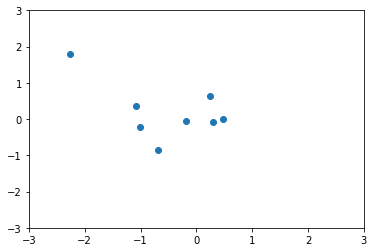

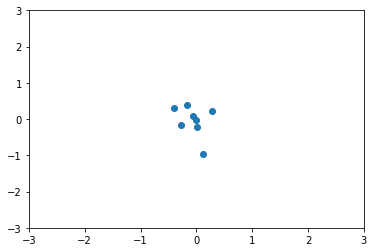

In [44]:
optimization_steps = 1000
simulated_pop_size = 1000
d_x = 0.01
lr = 0.1
clip = 0.1
candidate_dims_predicted = np.zeros((2, 1, n_candidates))
# candidate_dims_predicted = np.random.normal(0, 1, (2, 1, n_candidates))

for i_step in range(optimization_steps):
    print(i_step, get_loss(generate_ballots(candidate_dims_predicted, simulated_pop_size), ballots_actual))
    
    candidate_dims_predicted_ = np.copy(candidate_dims_predicted)
    for i_candidate in range(n_candidates):
        d_x_ = np.zeros((2, 1, n_candidates))
        d_x_[0, 0, i_candidate] = d_x
        d_y_ = np.zeros((2, 1, n_candidates))
        d_y_[1, 0, i_candidate] = d_x
        
        neg_candidate_x_loss = get_loss(generate_ballots(candidate_dims_predicted - d_x_, simulated_pop_size), ballots_actual)
        pos_candidate_x_loss = get_loss(generate_ballots(candidate_dims_predicted + d_x_, simulated_pop_size), ballots_actual)
        neg_candidate_y_loss = get_loss(generate_ballots(candidate_dims_predicted - d_y_, simulated_pop_size), ballots_actual)
        pos_candidate_y_loss = get_loss(generate_ballots(candidate_dims_predicted + d_y_, simulated_pop_size), ballots_actual)
        
#         print(pos_candidate_x_loss, neg_candidate_x_loss)
        candidate_dims_predicted_[0, 0, i_candidate] -= lr * np.clip((pos_candidate_x_loss - neg_candidate_x_loss) / 2 / d_x, -clip, clip)
        candidate_dims_predicted_[1, 0, i_candidate] -= lr * np.clip((pos_candidate_y_loss - neg_candidate_y_loss) / 2 / d_x, -clip, clip)
    
    candidate_dims_predicted = np.copy(candidate_dims_predicted_)
    
    actual_distances = np.sqrt(np.sum(np.power(candidate_dims_actual, 2), axis=0))
    predicted_distances = np.sqrt(np.sum(np.power(candidate_dims_predicted, 2), axis=0))
    print(actual_distances, np.argsort(actual_distances))
    print(predicted_distances, np.argsort(predicted_distances))
    print(np.dot(actual_distances, predicted_distances.T) / (np.linalg.norm(actual_distances) * np.linalg.norm(predicted_distances)))
    
print(ballots_actual, generate_ballots(candidate_dims_predicted, simulated_pop_size))
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(candidate_dims_actual[0, 0], candidate_dims_actual[1, 0])
plt.show()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(candidate_dims_predicted[0, 0], candidate_dims_predicted[1, 0])
plt.show()